In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

In [5]:
df_DE['job_posted_month'] = df_DE['job_posted_date'].dt.month

In [11]:
df_DE_explode = df_DE.explode('job_skills')
df_DE_explode_pivot = df_DE_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [13]:
df_DE_explode_pivot.loc['Total'] = df_DE_explode_pivot.sum()

In [14]:
df_DE_explode_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,2897,3,263,175,8,400,0,4,16,37,...,5,371,10,432,0,0,1,0,151,59
2,2132,2,195,112,6,313,0,4,8,30,...,5,319,7,321,0,0,1,5,103,33
3,2187,5,205,92,7,340,3,4,8,19,...,6,270,8,328,0,1,0,0,124,29
4,2162,4,179,158,2,298,2,1,6,19,...,5,252,6,261,0,0,0,2,97,21
5,1988,1,167,153,3,272,0,4,7,9,...,1,232,5,233,0,0,0,1,93,23
6,2254,3,235,141,5,320,3,0,8,20,...,4,274,11,275,1,0,3,0,100,28
7,2015,9,208,99,0,268,0,0,9,18,...,7,302,6,246,2,0,0,0,76,28
8,2111,16,201,127,1,278,2,6,4,25,...,2,312,9,272,1,0,1,0,121,23
9,1812,5,186,91,4,259,1,2,4,13,...,3,276,9,256,0,0,4,1,101,20


In [22]:
# Using the loc sortvalues to retrieve the index and then sort using the brackets on the pivot table
df_DE_explode_pivot = df_DE_explode_pivot[df_DE_explode_pivot.loc['Total'].sort_values(ascending=False).index]

df_DE_explode_pivot = df_DE_explode_pivot.drop('Total')

In [23]:
df_DE_explode_pivot.iloc[ :, :5]

job_skills,sql,python,aws,azure,spark
job_posted_month,,,,,
1,12987,12426,6924,7138,6567
2,9792,9378,5446,5278,4948
3,9831,9410,5580,5283,4764
4,8975,8670,5012,4901,4316
5,8411,8169,4768,4466,3991
6,9713,9216,5280,5091,4654
7,9032,8493,5015,4857,4044
8,9565,9016,5330,5070,4436
9,8663,8213,4612,4646,3902


Text(0, 0.5, 'Count')

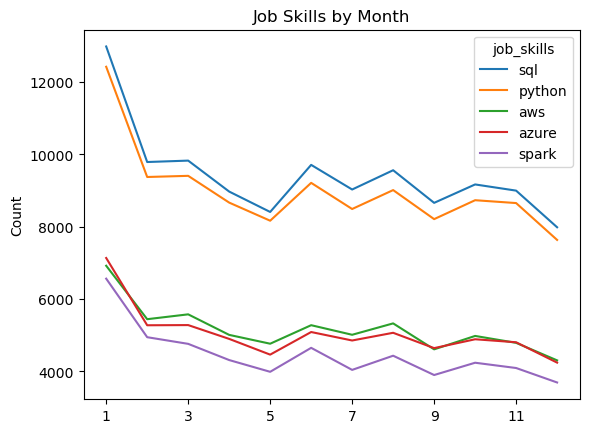

In [25]:
df_DE_explode_pivot.iloc[ :, :5].plot(kind='line')
plt.title('Job Skills by Month')
plt.xlabel('')
plt.ylabel('Count')